In [2]:
#Task-3
#Build a decision tree classifier to predict whether a customer will purchase a product or
#service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing
#dataset from the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
df = pd.read_csv('/content/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [20]:
#Preprocess the data
X = df.drop('poutcome', axis=1)
y = df['poutcome']
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9197169081057172


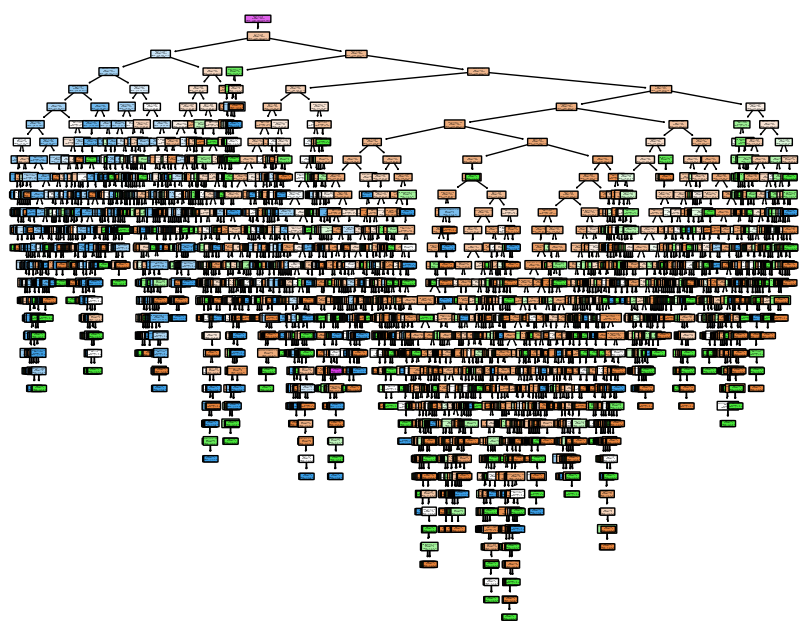

In [21]:
#Decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=y.unique().tolist(), filled=True, rounded=True)
plt.show()

In [24]:
clf_pruned = DecisionTreeClassifier(ccp_alpha=0.01)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)

accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print("Accuracy with pruning:", accuracy_pruned)

Accuracy with pruning: 0.928674112573261


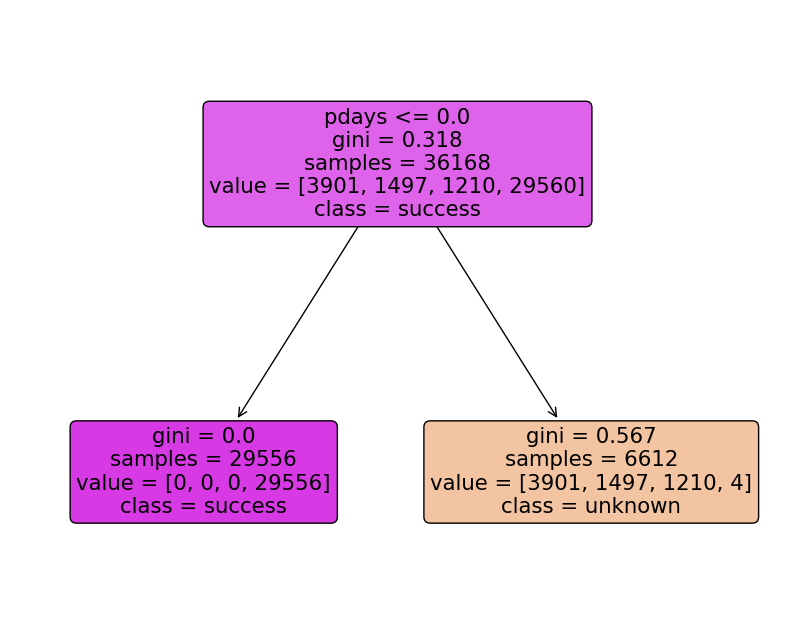

In [25]:
#Pruned decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf_pruned, feature_names=X.columns, class_names=y.unique().tolist(), filled=True, rounded=True)
plt.show()